# GOES Total Precipitable Water
`ABI-L2-TPWF` is not an RGB prodcut, it is a Level 2 *derived* product.

In [1]:
import xarray as xr
from toolbox.cartopy_tools import common_features  # <-- This is from https://github.com/blaylockbk/Carpenter_Workshop
import matplotlib.pyplot as plt
from goes2go.data import goes_nearesttime, goes_latest
from goes2go.tools import abi_crs

# TPW CONUS

In [2]:
ds = goes_nearesttime('2020-12-14', product='ABI-L2-TPW', domain='C')
ds

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-TPWC      |
 |    Domain: C                |
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes16/ABI-L2-TPWC].
📚 Finished reading [1] files into xarray.Dataset.


<xarray.Dataset>
Dimensions:                                           (y: 300, x: 500, number_of_time_bounds: 2, number_of_image_bounds: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_lat_bounds: 2, sounding_emissive_bands: 7)
Coordinates: (12/15)
    t                                                 datetime64[ns] ...
  * y                                                 (y) float32 0.1281 ... ...
  * x                                                 (x) float32 -0.1012 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    retrieval_local_zenith_angle                      float32 ...
    ...                                                ...
    sounding_emissive_wavelengths                     (sounding_emissive_bands) float32 ...
    sounding_emissive_band_ids                        (sounding_emissive_bands) int8 ...
    dataset_name                                      <U72 'OR_ABI-L2-TPWC-M6...
    date_created                                      <U22 '2020-12-14T00:05:...
    time_coverage_start                               <U22 '2020-12-14T00:01:...
    time_coverage_end                                 <U22 '2020-12-14T00:03:...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, number_of_LZA_bounds, number_of_SZA_bounds, number_of_lat_bounds, sounding_emissive_bands
Data variables: (12/30)
    TPW                                               (y, x) float32 ...
    DQF_Overall                                       (y, x) float32 ...
    DQF_Retrieval                                     (y, x) float32 ...
    DQF_SkinTemp                                      (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    ...                                                ...
    percent_uncorrectable_L0_errors                   float32 ...
    percent_uncorrectable_GRB_errors                  float32 ...
    total_attempted_retrievals                        float64 ...
    mean_obs_modeled_diff_sounding_emissive_bands     (sounding_emissive_bands) float32 ...
    std_dev_obs_modeled_diff_sounding_emissive_bands  (sounding_emissive_bands) float32 ...
    filename                                          <U108 'noaa-goes16/ABI-...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    processing_level:          National Aeronautics and Space Administration ...
    cdm_data_type:             Image
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        07a697ed-a150-4c8f-b3a9-a00af27a7b20
    path:                      ['noaa-goes16/ABI-L2-TPWC/2020/349/00/OR_ABI-L...

In [3]:
crs, x, y = abi_crs(ds, 'TPW')

Text(0.5, 1.0, '00:02 UTC 14 Dec 2020')

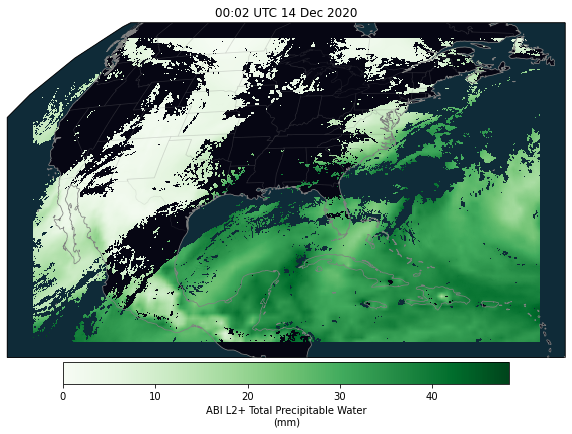

In [4]:
ax = common_features('50m', crs=crs, figsize=[10,8], dark=True).STATES().OCEAN().LAND().ax
c = ax.pcolormesh(x, y, ds.TPW, transform=crs, cmap='Greens', vmin=0)
plt.colorbar(c, ax=ax, shrink=.8, pad=.01, orientation='horizontal', label=f"{ds.TPW.long_name}\n({ds.TPW.units})")
ax.set_title(f"{ds.t.dt.strftime('%H:%M UTC %d %b %Y').item()}")

## TWP Full Disk

In [5]:
ds = goes_nearesttime('2020-12-14', product='ABI-L2-TPWF', domain='F')
ds

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-TPWF      |
 |    Domain: F                |
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes16/ABI-L2-TPWF].
📚 Finished reading [1] files into xarray.Dataset.


<xarray.Dataset>
Dimensions:                                           (y: 1086, x: 1086, number_of_time_bounds: 2, number_of_image_bounds: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_lat_bounds: 2, sounding_emissive_bands: 7)
Coordinates: (12/15)
    t                                                 datetime64[ns] ...
  * y                                                 (y) float32 0.1519 ... ...
  * x                                                 (x) float32 -0.1519 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    retrieval_local_zenith_angle                      float32 ...
    ...                                                ...
    sounding_emissive_wavelengths                     (sounding_emissive_bands) float32 ...
    sounding_emissive_band_ids                        (sounding_emissive_bands) int8 ...
    dataset_name                                      <U72 'OR_ABI-L2-TPWF-M6...
    date_created                                      <U22 '2020-12-14T00:10:...
    time_coverage_start                               <U22 '2020-12-14T00:00:...
    time_coverage_end                                 <U22 '2020-12-14T00:09:...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, number_of_LZA_bounds, number_of_SZA_bounds, number_of_lat_bounds, sounding_emissive_bands
Data variables: (12/30)
    TPW                                               (y, x) float32 ...
    DQF_Overall                                       (y, x) float32 ...
    DQF_Retrieval                                     (y, x) float32 ...
    DQF_SkinTemp                                      (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    ...                                                ...
    percent_uncorrectable_L0_errors                   float32 ...
    percent_uncorrectable_GRB_errors                  float32 ...
    total_attempted_retrievals                        float64 ...
    mean_obs_modeled_diff_sounding_emissive_bands     (sounding_emissive_bands) float32 ...
    std_dev_obs_modeled_diff_sounding_emissive_bands  (sounding_emissive_bands) float32 ...
    filename                                          <U108 'noaa-goes16/ABI-...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    processing_level:          National Aeronautics and Space Administration ...
    cdm_data_type:             Image
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        e4eab11a-4da8-454d-903c-07472bed0229
    path:                      ['noaa-goes16/ABI-L2-TPWF/2020/349/00/OR_ABI-L...

In [6]:
crs, x, y = abi_crs(ds, 'TPW')

Text(0.5, 1.0, '00:04 UTC 14 Dec 2020')

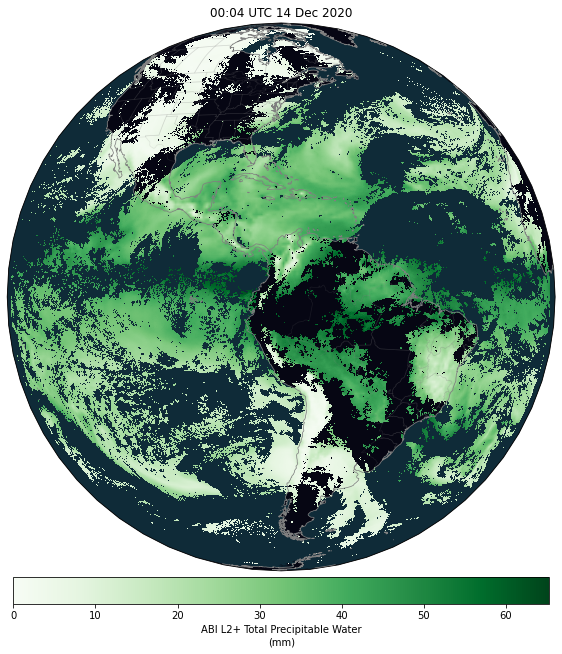

In [7]:
ax = common_features('50m', crs=crs, figsize=[12,12], dark=True).STATES().OCEAN().LAND().ax
c = ax.pcolormesh(x, y, ds.TPW, transform=crs, cmap='Greens', vmin=0)
plt.colorbar(c, ax=ax, shrink=.8, pad=.01, orientation='horizontal', label=f"{ds.TPW.long_name}\n({ds.TPW.units})")
ax.set_title(f"{ds.t.dt.strftime('%H:%M UTC %d %b %Y').item()}")